In [2]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [3]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2021-04-12,0.004025
2021-04-13,-0.013308
2021-04-14,0.003620
2021-04-15,0.012022
2021-04-16,0.000073


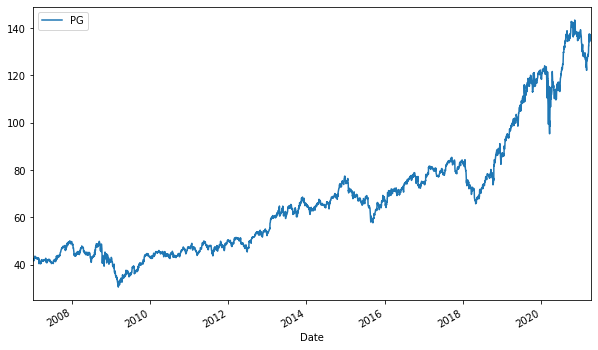

In [5]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

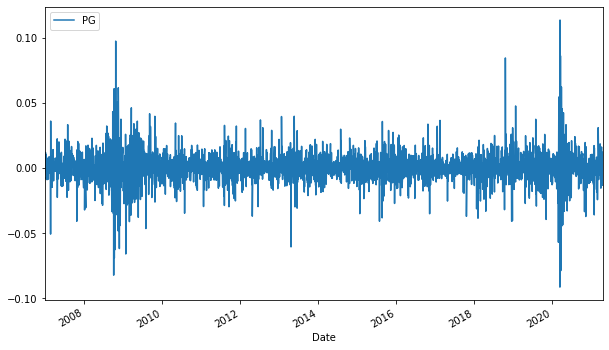

In [6]:
log_returns.plot(figsize = (10, 6))

In [7]:
u = log_returns.mean()
u

PG    0.000327
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000141
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

PG    0.000257
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

PG    0.011854
dtype: float64

******

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.00025653])

In [14]:
drift.values

array([0.00025653])

In [15]:
stdev.values

array([0.01185387])

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [17]:
x = np.random.rand(10, 2)
x

array([[0.0723079 , 0.52758248],
       [0.31462528, 0.9964943 ],
       [0.09429561, 0.38814881],
       [0.16388151, 0.25267229],
       [0.24634182, 0.44703576],
       [0.03079381, 0.75916437],
       [0.08425746, 0.33680002],
       [0.71805038, 0.84804109],
       [0.3714553 , 0.11941375],
       [0.73052688, 0.29517609]])

In [18]:
norm.ppf(x)

array([[-1.45881586,  0.0691942 ],
       [-0.48278195,  2.69630255],
       [-1.3147581 , -0.28414713],
       [-0.9786296 , -0.66610406],
       [-0.68604674, -0.1331541 ],
       [-1.86925309,  0.70361711],
       [-1.37699135, -0.42121233],
       [ 0.57705953,  1.02806805],
       [-0.3280014 , -1.1779225 ],
       [ 0.61440726, -0.53832575]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.08741759,  1.51584978],
       [ 1.48225741, -0.01653493],
       [ 0.7065149 ,  1.52620713],
       [-1.89476686,  2.1598644 ],
       [-0.37201497,  1.13898501],
       [-1.09517926,  1.37758871],
       [ 2.85126599, -1.39963079],
       [ 0.84147719, -2.24223252],
       [-0.84109109, -1.57618617],
       [-1.25446909, -0.31149239]])

In [19]:
t_intervals = 1000
iterations = 10

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[1.00304644, 0.99654224, 1.01501856, ..., 1.01294084, 1.00691201,
        0.99884097],
       [1.00422   , 0.97331216, 1.00961965, ..., 1.01426455, 1.00277362,
        0.98552233],
       [0.99833137, 1.01706215, 1.01446338, ..., 0.99040671, 1.00534923,
        1.00579497],
       ...,
       [1.00578174, 1.01578388, 1.00123422, ..., 1.00683609, 1.00145905,
        1.00596352],
       [1.00839267, 0.98493217, 0.99000048, ..., 0.98813117, 1.00765053,
        0.99808742],
       [1.02041018, 0.99324443, 0.99932552, ..., 1.01486943, 1.01155323,
        1.0110952 ]])